# 4-10 Coding etiquette and Excel reporting

### 1. Imports libraries and dataframes
  
### 3. Data Segmentation by Region
#### 3.1 Segmention in Northeast, Midwest, South and West
#### 3.2.Creating crosstab to spender_flag

### 4. Excluding low-activity customers from data

### 5. Customers profiling
#### 4.1. Having a look on the dataset
#### 4.2. Distribution by age
#### 4.3. Distribution by number of dependants - Household
#### 4.4. Distribution by income

### 6. Visualizations
#### 5.1. Creating an user_profile dataframe
#### 5.2. Age distribution
#### 5.3. Income distribution
#### 5.4. Household size distribution

### 7. Aggregation 
#### 6.1. Aggregation by age group
#### 6.2. Aggregation by Income Group
#### 6.3. Aggregation by Household size

### 8. Comparison between regions vs departments
#### 8.1. Income Groups vs Region
#### 8.2. Age Groups vs Region
#### 8.3. Household size vs Region

# Import libraries

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data

In [13]:
df_cust=pd.read_csv(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 4\Exc 4.3\Original data\customers\customers.csv',index_col=False)

In [14]:
df_cust.shape

(206209, 10)

In [15]:
# columns rename

In [16]:
df_cust.rename(columns={'Surnam':'surname'},inplace=True)

In [17]:
df_cust.rename(columns={'First Name':'first_name'},inplace=True)

In [18]:
df_cust.rename(columns={'Gender':'gender'},inplace=True)

In [19]:
df_cust.rename(columns={'STATE':'state'},inplace=True)

In [20]:
df_cust.rename(columns={'Age':'age'},inplace=True)

In [21]:
df_cust.rename(columns={'n_dependants':'dependants'},inplace=True)

In [22]:
# change first name mix column   to str type

In [23]:
df_cust['first_name'] = df_cust['first_name'].astype('str')

In [24]:
# change 'user_id' to 'str'

In [25]:
df_cust['user_id'] = df_cust['user_id'].astype('str')

In [231]:
path='D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 4\Exc 4.3'

# Import ords_prods_merge data

In [27]:
ords_prods_merge=pd.read_pickle(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 4\Exc 4.3\Prepared data\orders_products_merged_agg.pkl')

In [28]:
ords_prods_merge.shape

(32404859, 24)

In [29]:
# change ords_prods_merge 'user_id' to str

In [30]:
ords_prods_merge['user_id']=ords_prods_merge['user_id'].astype('str')

In [31]:
ords_prods_merge['user_id'].dtype

dtype('O')

In [32]:
# drop merge column as indicates that the DataFrame you're trying to merge already contains a column named "_merge"

In [33]:
ords_prods_merge = ords_prods_merge.drop(columns=['_merge'])

In [34]:
# Merge the two dataframes using the column 'user_id' as the shared column with the default join (inner)

In [35]:

# Function to optimize memory usage

In [36]:
def optimize_memory_usage(df):
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    return df

In [37]:
# Optimize memory usage for both dataframes

In [38]:
ords_prods_merge = optimize_memory_usage(ords_prods_merge)

In [39]:
df_cust = optimize_memory_usage(df_cust)

In [40]:
ords_prods_merge.shape

(32404859, 23)

In [41]:
df_cust.shape

(206209, 10)

# Merge data

In [43]:
cust_ords_prods_merge = ords_prods_merge.merge(df_cust, on='user_id', indicator=True)

In [44]:
cust_ords_prods_merge.shape

(32404859, 33)

In [45]:
cust_ords_prods_merge['_merge'].value_counts()

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

#  Task 2

I would have removed first and last name, because it is already identifiable by 'user_ID'. But before I would have done this, I would have discussed this step with a colleague to get an opinion if the line of thought is correct. For this exercise, I am not removing any column of information.

# Create Regional segmentation of the data

In [49]:
#Region 1-'Northeast'
cust_ords_prods_merge.loc[cust_ords_prods_merge['state'].isin([ 'Maine',
    'New Hampshire',
    'Vermont',
    'Massachusetts',
    'Rhode Island',
    'Connecticut',
    'New York',
    'Pennsylvania',
    'New Jersey']),'region'] = 'Northeast'

In [50]:
#Region 2-'Midwest'
cust_ords_prods_merge.loc[cust_ords_prods_merge['state'].isin(['Wisconsin',
        'Michigan',
        'Illinois',
        'Indiana',
        'Ohio',
        'North Dakota',
        'South Dakota',
        'Nebraska',
        'Kansas',
        'Minnesota',
        'Iowa',
        'Missouri']),'region'] = 'Midwest'

In [51]:
#Region 3-'South'
cust_ords_prods_merge.loc[cust_ords_prods_merge['state'].isin(['Delaware',
        'Maryland',
        'District of Columbia',
        'Virginia',
        'West Virginia',
        'North Carolina',
        'South Carolina',
        'Georgia',
        'Florida',
        'Kentucky',
        'Tennessee',
        'Mississippi',
        'Alabama',
        'Oklahoma',
        'Texas',
        'Arkansas',
        'Louisiana' ]), 'region'] = 'South'

In [52]:
#Region 4-West
cust_ords_prods_merge.loc[cust_ords_prods_merge['state'].isin([      'Idaho',
        'Montana',
        'Wyoming',
        'Nevada',
        'Utah',
        'Colorado',
        'Arizona',
        'New Mexico',
        'Alaska',
        'Washington',
        'Oregon',
        'California',
        'Hawaii' ]), 'region'] = 'West'

In [53]:
cust_ords_prods_merge['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [54]:
cust_ords_prods_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'Avg_spend',
       'Spender_flag', 'Customer_frequency', 'Frequency_flag', 'first_name',
       'surname', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'fam_status', 'income', '_merge', 'region'],
      dtype='object')

# Creating crosstab to spender_flag

In [56]:
Crosstab_region_spender=pd.crosstab(cust_ords_prods_merge['region'],cust_ords_prods_merge['Spender_flag'],dropna=False)

In [57]:
#checking result of crosstab
Crosstab_region_spender

Spender_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [58]:
#  Create a bar chart to show difference in spending habits between the different U.S. regions

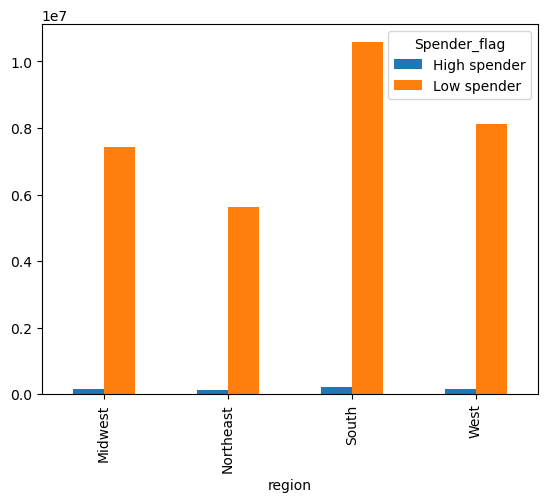

In [59]:
Bar=Crosstab_region_spender.sort_index().plot.bar()

In [60]:
bar=Bar.figure.savefig(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 4\Exc 4.3\Analysis\viz\region_spender_flag.png')

The bar chart shows that spending habits vary significantly across different U.S. regions. The South region has the highest spending, followed by the West, Midwest, and Northeast. High spenders contribute more to the total spending in all regions compared to low spenders. The Northeast has the lowest overall spending.

# Task 4


In [63]:
#  Create an exclusion flag for low-activity customers and exclude them


In [64]:
cust_ords_prods_merge.loc[cust_ords_prods_merge['max_order']<5, 'activity_flag']='low_activity_customers'

In [65]:
cust_ords_prods_merge.loc[cust_ords_prods_merge['max_order']>5, 'activity_flag']='high_activity_customers'

In [66]:
# subset high_activity_cust data 

In [67]:
df_high_activity_cust=cust_ords_prods_merge.loc[cust_ords_prods_merge['activity_flag']=='high_activity_customers']

In [68]:
df_high_activity_cust.shape

(30171424, 35)

In [69]:
# Export high _actvity_cust data set

In [70]:
df_high_activity_cust.to_pickle(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 4\Exc 4.10\df_high_activity_cust.pkl')

# Task 5

# Customer profiling


In [73]:
df_high_activity_cust.shape

(30171424, 35)

In [74]:
# profile based on age


In [75]:
df_high_activity_cust.loc[(df_high_activity_cust['age'] >=18) & (df_high_activity_cust['age'] <=30), 'age_group'] = 'Single Adult'

C:\Users\nmsp1\AppData\Local\Temp\ipykernel_3944\842900059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity_cust.loc[(df_high_activity_cust['age'] >=18) & (df_high_activity_cust['age'] <=30), 'age_group'] = 'Single Adult'


In [76]:
df_high_activity_cust.loc[(df_high_activity_cust['age'] > 30) & (df_high_activity_cust['age'] <= 45), 'age_group'] = 'Young Parent'

In [77]:
df_high_activity_cust.loc[(df_high_activity_cust['age'] > 45) & (df_high_activity_cust['age'] < 60), 'age_group'] = 'Mid Aged Adult'

In [78]:
df_high_activity_cust.loc[df_high_activity_cust['age'] >= 60, 'age_group'] = 'Senior'

In [79]:
df_high_activity_cust['age_group'].value_counts(dropna = False)

age_group
Senior            10305785
Young Parent       7075504
Mid Aged Adult     6646727
Single Adult       6143408
Name: count, dtype: int64

In [80]:
# Profile based on income

In [81]:
df_high_activity_cust.loc[df_high_activity_cust['income'] <= 50000, 'income_group'] = 'Low Income'

C:\Users\nmsp1\AppData\Local\Temp\ipykernel_3944\1827802626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity_cust.loc[df_high_activity_cust['income'] <= 50000, 'income_group'] = 'Low Income'


In [82]:
df_high_activity_cust.loc[(df_high_activity_cust['income']> 50000) & (df_high_activity_cust['income'] < 150000), 'income_group'] = 'Mid Income'

In [83]:
df_high_activity_cust.loc[df_high_activity_cust['income'] >= 150000, 'income_group'] = 'High Income'

In [84]:
df_high_activity_cust['income_group'].value_counts(dropna = False)

income_group
Mid Income     23120016
High Income     3802574
Low Income      3248834
Name: count, dtype: int64

In [85]:
# Profile based on order_day_of_week

In [86]:
df_high_activity_cust.loc[df_high_activity_cust['orders_day_of_week'].isin([0,1]), 'day_group'] = 'Weekend'

C:\Users\nmsp1\AppData\Local\Temp\ipykernel_3944\4292663799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity_cust.loc[df_high_activity_cust['orders_day_of_week'].isin([0,1]), 'day_group'] = 'Weekend'


In [87]:
df_high_activity_cust.loc[df_high_activity_cust['orders_day_of_week'].isin([2,3,4,5,6]), 'day_group'] = 'Weekday'

In [88]:
df_high_activity_cust['day_group'].value_counts(dropna = False)

day_group
Weekday    19149044
Weekend    11022380
Name: count, dtype: int64

In [89]:
# # profile based on order_hour_of_day

In [90]:
df_high_activity_cust.loc[(df_high_activity_cust['order_hour_of_day'] >= 6) & (df_high_activity_cust['order_hour_of_day'] < 12), 'Hour_group'] = 'Morning Shopper'

C:\Users\nmsp1\AppData\Local\Temp\ipykernel_3944\334530809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity_cust.loc[(df_high_activity_cust['order_hour_of_day'] >= 6) & (df_high_activity_cust['order_hour_of_day'] < 12), 'Hour_group'] = 'Morning Shopper'


In [91]:
df_high_activity_cust.loc[(df_high_activity_cust['order_hour_of_day'] >= 12) & (df_high_activity_cust['order_hour_of_day'] < 17), 'Hour_group'] = 'Afternoon Shopper'

In [92]:
df_high_activity_cust.loc[(df_high_activity_cust['order_hour_of_day'] >= 17) & (df_high_activity_cust['order_hour_of_day'] < 21), 'Hour_group'] = 'Evening Shopper'

In [93]:
df_high_activity_cust.loc[(df_high_activity_cust['order_hour_of_day'] >= 21) & (df_high_activity_cust['order_hour_of_day'] < 6), 'Hour_group'] = 'Night Shopper'

In [94]:
df_high_activity_cust['Hour_group'].value_counts(dropna = False)

Hour_group
Afternoon Shopper    12214485
Morning Shopper      10198759
Evening Shopper       5495896
NaN                   2262284
Name: count, dtype: int64

In [95]:
 # profile based on dependants

In [96]:
df_high_activity_cust.loc[df_high_activity_cust['dependants'].isin([0,1]), 'Household size'] = 'Small'

C:\Users\nmsp1\AppData\Local\Temp\ipykernel_3944\1286796603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_activity_cust.loc[df_high_activity_cust['dependants'].isin([0,1]), 'Household size'] = 'Small'


In [97]:
df_high_activity_cust.loc[df_high_activity_cust['dependants'].isin([2,3]), 'Household size'] = 'Big'

In [98]:
df_high_activity_cust['Household size'].value_counts(dropna = False)

Household size
Big      15108568
Small    15062856
Name: count, dtype: int64

# Task 6

# visualization-Age

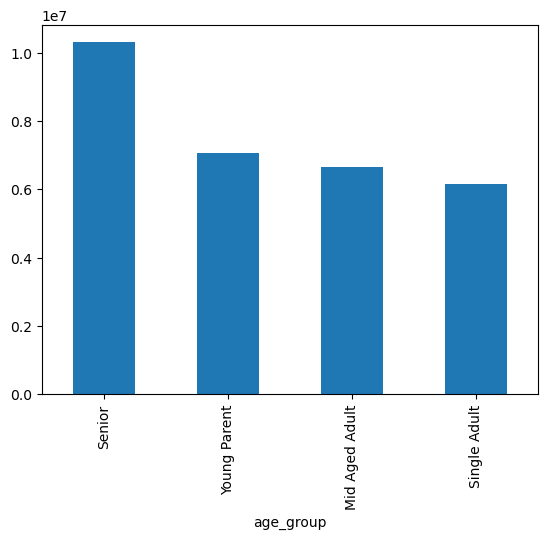

In [241]:
Bar1=df_high_activity_cust['age_group'].value_counts().plot.bar()
bar=Bar1.figure.savefig(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 4\Exc 4.3\Analysis\viz\age_group.png')

The chart shows age group distribution, with Seniors being the largest group at nearly 10 million, followed by Young Parents, Mid Aged Adults, and Single Adults in descending order.

# visualization-income

In [104]:
income_group_counts = df_high_activity_cust['income_group'].value_counts()

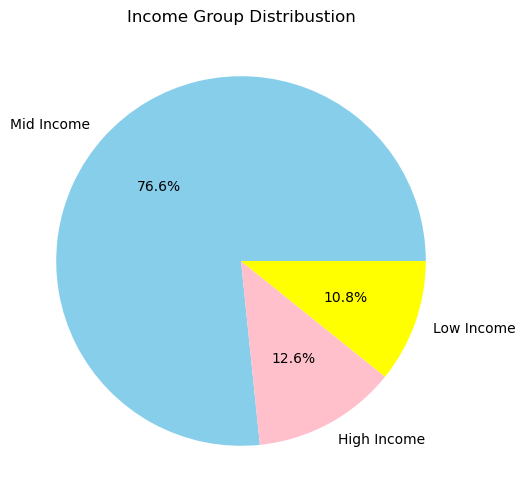

In [239]:
plt.figure(figsize=(6, 6))
plt.pie(income_group_counts, 
        labels = income_group_counts.index, 
        autopct='%.1f%%',
        colors = ['skyblue', 'pink', 'yellow'])
plt.title('Income Group Distribustion')
plt.savefig(os.path.join(path, 'Analysis', 'viz', 'customers_age_groups_pie.png'), bbox_inches = 'tight')
plt.show()

The pie chart shows income distribution:

Mid Income dominates at 76.7%
High Income follows at 12.6%
Low Income is smallest at 10.7%

There's a large gap between Mid Income and the other categories, while High and Low Income groups are similar in size.

# visualization-order_day_of_week

In [108]:
day_group_counts = df_high_activity_cust['day_group'].value_counts()

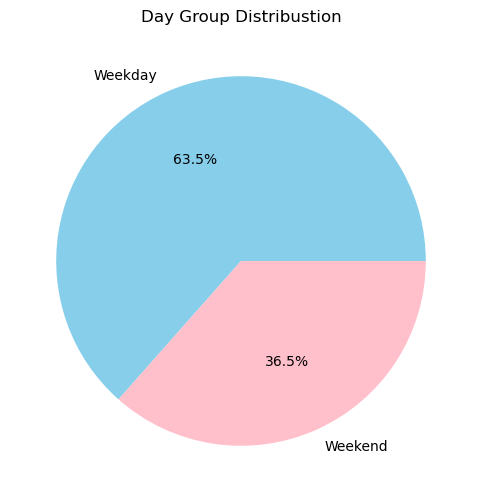

In [244]:
plt.figure(figsize=(6, 6))
plt.pie(day_group_counts, 
        labels = day_group_counts.index, 
        autopct='%.1f%%',
        colors = ['skyblue', 'pink', 'yellow'])
plt.title('Day Group Distribustion')
plt.savefig(os.path.join(path, 'Analysis', 'viz', 'order_day_of_week_pie.png'), bbox_inches = 'tight')
plt.show()

The pie chart shows the distribution of day groups:

Weekdays account for 63.5% of the total
Weekends make up 36.5%

# visualization-order_hour_of_day


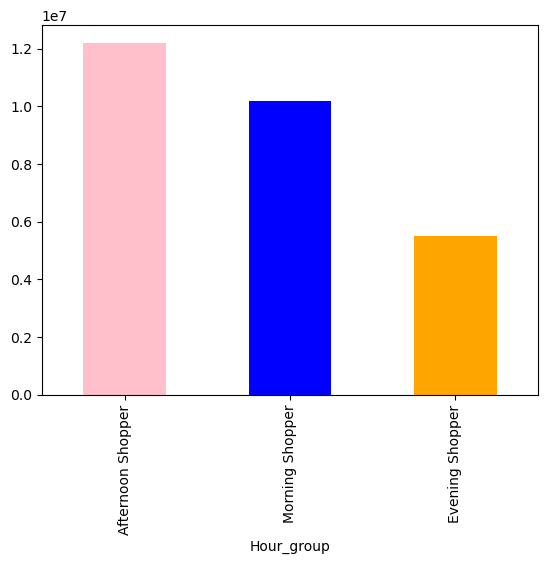

In [112]:
Bar2 =Bar1=df_high_activity_cust['Hour_group'].value_counts().plot.bar(color=['pink','blue','orange'])

The data indicates that shopping activity peaks in the afternoon, remains strong in the morning, and decreases significantly in the evening. 

# visualization-Household size

In [115]:
household_size_table = df_high_activity_cust['Household size'].value_counts()

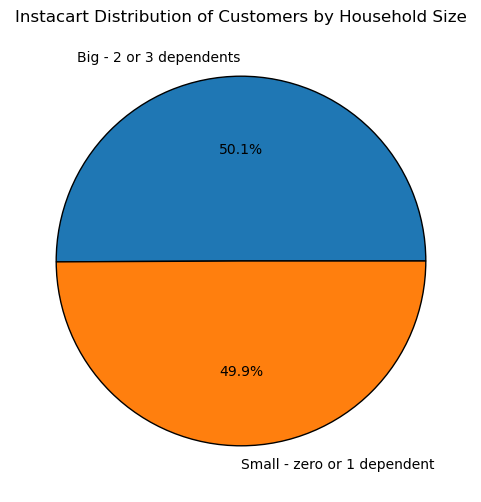

In [250]:
plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(household_size_table, 
        #labels = household_size_table.index, 
        labels = ('Big - 2 or 3 dependents', 'Small - zero or 1 dependent'),
        autopct='%.1f%%', # Show percentage to 1 d.p
        wedgeprops = {'edgecolor' : 'black'}) # boarders
plt.title('Instacart Distribution of Customers by Household Size') # title
plt.savefig(os.path.join(path,'Analysis', 'viz','Household_size_pie.png'), bbox_inches = 'tight')
plt.show()

The distribution is almost evenly split, with a negligible 0.2% difference favoring larger households. This suggests that Instacart's customer base is balanced between smaller and larger households

In [118]:
df_high_activity_cust.shape

(30171424, 40)

In [119]:
df_high_activity_cust.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,fam_status,income,_merge,region,activity_flag,age_group,income_group,day_group,Hour_group,Household size
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,married,49620,both,Midwest,high_activity_customers,Senior,Low Income,Weekday,Morning Shopper,Small
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,married,49620,both,Midwest,high_activity_customers,Senior,Low Income,Weekday,Evening Shopper,Small
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,married,57797,both,West,high_activity_customers,Mid Aged Adult,Mid Income,Weekend,Morning Shopper,Big
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,living with parents and siblings,34171,both,South,high_activity_customers,Single Adult,Low Income,Weekday,Afternoon Shopper,Big
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,divorced/widowed,44856,both,South,high_activity_customers,Senior,Low Income,Weekday,Morning Shopper,Small


# Task 7

In [121]:
# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

This analysis will provides insights into customer behavior patterns, showing the range and typical values of how often they use the service and how much they spend. It helps identify high-value customers, occasional users, and overall usage trends.



In [123]:
# To be continued in the next part of the notebook.


# Export the data

In [125]:
df_high_activity_cust.to_pickle(r'D:\Sonal\career foundry\CareerFoundry\Data Immersion\Achievement 4\Exc 4.10\Active_cust_new.pkl')

In [126]:
df_high_activity_cust.shape

(30171424, 40)